In [13]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt

In [14]:
k1b=10 #s^-1
k2f=22 #s^-1
KmS = 210*10**(-6) #M
KmP = 97*10**(-6) #M

k1f= (k1b+k2f)/KmS
k2b= (k1b+k2f)/KmP #(s*M)^-1


In [15]:
t=np.linspace(0,5,1000)
E0 = 0.1 #mol/l
S0 = 1
P0 = 0 
V=1 

initial_conditions = [E0,S0,P0]

def equations(values, t):
    NE, NS, NP = values

    CE = NE / V
    CS = NS / V
    CP = NP / V
    
    CES = E0*(k1f*CS + k2f*CP)/(k1b + k2f + k1f*CS + k2b*CP)
    
    RE = -k1f*CE*CS + (k1b+k2f)*CES - k2b*CE*CP
    RS = -k1f*CE*CS + k1b*CES
    RP = k2f*CES - k2b*CE*CP
    
    
    dNE = RE * V
    dNS = RS * V
    dNP = RP * V

    return dNE, dNS, dNP

######
results = odeint(equations, initial_conditions, t)
NE, NS, NP = results.T

CE = NE / V
CS = NS / V
CP = NP / V

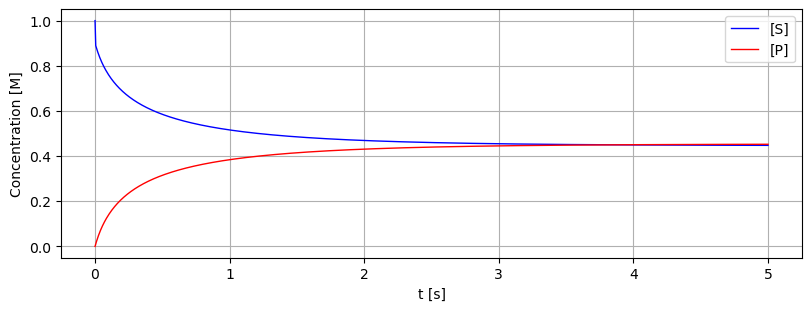

In [16]:
#PLOT

plt.rcParams['figure.constrained_layout.use'] = True
plt.rcParams['lines.linewidth'] = 1.0
plt.rcParams.update({'font.size': 10})
fig, ax = plt.subplots(figsize=(8,3))
ax.plot(t, CS, label='[S]', c='blue')
ax.plot(t, CP, label='[P]', c='red')
ax.set_xlabel("t [s]")
ax.set_ylabel("Concentration [M]")
ax.legend()
ax.grid()
#fig.savefig('prj2_ex3_d.jpg')
plt.show()

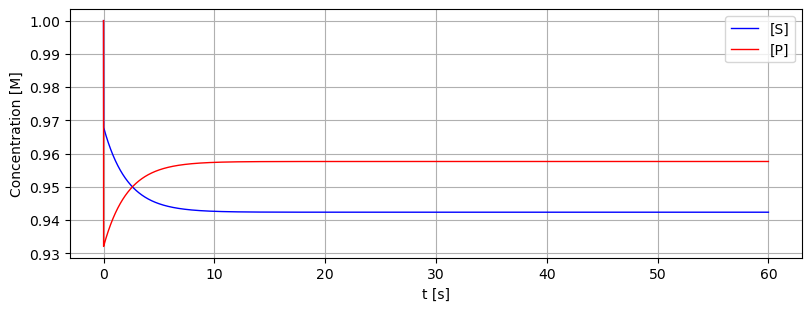

In [5]:
t=np.linspace(0,60,10000)
E0_e = 0.1 #mol/l
S0_e = 1
P0_e = 1
V=1 

initial_conditions_e = [E0_e,S0_e,P0_e]
results_e = odeint(equations, initial_conditions_e, t)
NE_e, NS_e, NP_e = results_e.T

CE_e = NE_e / V
CS_e = NS_e / V
CP_e = NP_e / V

fig, ax = plt.subplots(figsize=(8,3))
ax.plot(t, CS_e, label='[S]', c='blue')
ax.plot(t, CP_e, label='[P]', c='red')
ax.set_xlabel("t [s]")
ax.set_ylabel("Concentration [M]")
ax.legend()
ax.grid()
#fig.savefig('prj2_ex3_f.jpg')
plt.show()

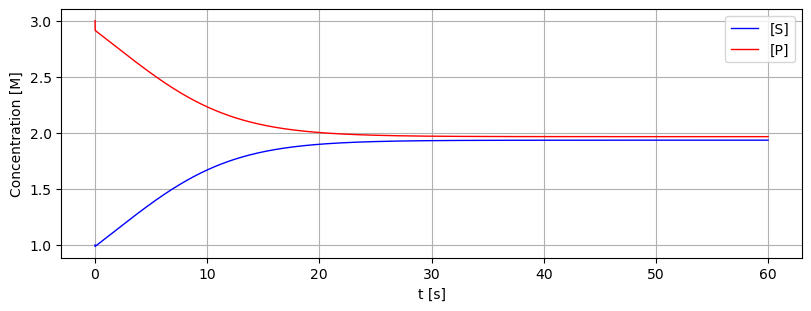

In [11]:
t=np.linspace(0,60,10000)
E0_f = 0.1 #mol/l
S0_f = 1
P0_f = 3
V=1  

initial_conditions_f = [E0_f,S0_f,P0_f]
results_f = odeint(equations, initial_conditions_f, t)
NE_f, NS_f, NP_f = results_f.T

CE_f = NE_f / V
CS_f = NS_f / V
CP_f = NP_f / V

fig, ax = plt.subplots(figsize=(8,3))
ax.plot(t, CS_f, label='[S]', c='blue')
ax.plot(t, CP_f, label='[P]', c='red')
ax.set_xlabel("t [s]")
ax.set_ylabel("Concentration [M]")
ax.legend()
ax.grid()
#fig.savefig('prj2_ex3_f.jpg')
plt.show()